# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 10

### Wstęp

Firma produkująca produkty mleczne posiada kilka zamówień do realizacji. Dane są zaprezentowane poniżej.

### Dane

**Ceny składników:**

| Składnik     | Cena (PLN) |
| :---         | ---: |
| Mleko (l)    | 3.5 |
| Cukier (kg)  | 5   |
| Kakao (100g) | 8   |
| Sól (kg)     | 2   |


**Składniki zapisane są w tabeli poniżej:**

| Prod.\Skł.| Mleko (l) | Cukier (kg)  | Kakao (100g) | Sól (kg)    |
| :---      |      ---: |         ---: |         ---: |        ---: |
| Masło     | 5         | 0            | 0            | 0           |
| Czekolada | 1         | 0.1          | 5            | 0.01        |
| Ser żółty | 10        | 0            | 0            | 0.05        |
| Twaróg    | 2         | 0            | 0            | 0.1         |


**Zamówienia klientów:**

| Klient\Prod.| Masło | Czekolada | Ser żółty | Twaróg |
| :---        |  ---: |      ---: |      ---: |   ---: |
| Klient 1    | 10    | 50        | 5         | 5      |
| Klient 2    | 120   | 90        | 15        | 25     |
| Klient 3    | 0     | 10        | 1         | 1      |


> **Uwaga**: Możesz użyć funkcji `plt.table` do wyświetlenia tabeli z wynikami.

> Informacja: Powyższe dane są przykładowe i nie mają przełożenia na faktyczne dane rynkowe.

### Zadanie 1

Korzystając z operacji macierzowych oblicz i odpowiedz na pytania:

#### A) Jaki jest koszt wyprodukowania każdego z produktów?






 

(0.0, 1.0, 0.0, 1.0)

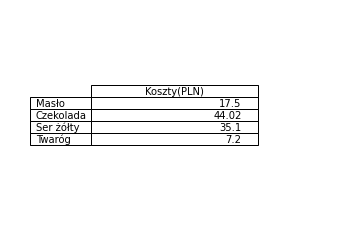

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ceny = np.array([3.5, 5, 8, 2])
skladniki = np.array([[5,0,0,0],[1,0.1,5,0.01],[10,0,0,0.05],[2,0,0,0.1]])

koszt = skladniki @ ceny 
row = ['Masło','Czekolada','Ser żółty','Twaróg']
col=[('Koszty(PLN)')]

koszt = koszt.reshape(4,1) 

plt.table(cellText=koszt,rowLabels=row, colLabels=col,loc='center',colWidths=[0.5])
plt.axis('off')

#### B) Ile składników zostanie uzytych na realizację zamówień klientów (każdego osobno i łącznie)?



(0.0, 1.0, 0.0, 1.0)

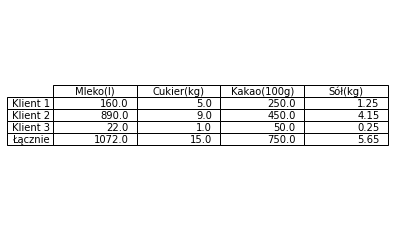

In [2]:
zamowienia = np.array([[10,50,5,5],[120,90,15,25],[0,10,1,1]])


ilosc = zamowienia @ skladniki

ilosc2 = np.vstack((ilosc , np.sum(ilosc, axis=0)))

row = ['Klient 1','Klient 2','Klient 3','Łącznie']
col=['Mleko(l)','Cukier(kg)','Kakao(100g)','Sół(kg)']

plt.table(cellText=ilosc2,rowLabels=row, colLabels=col,loc='center')
plt.axis('off')

#### C) Zakładając marżę $30\%$ (pomijając wszystkie inne czynniki), ile klienci będą musieli zapłacić za zrealizowanie zamówienia?



(0.0, 1.0, 0.0, 1.0)

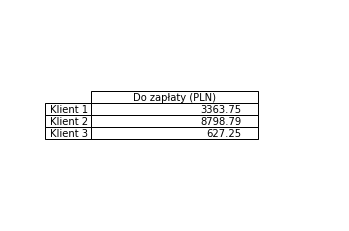

In [3]:
marza = ilosc @ ceny * 1.3
marza = marza.reshape(3,1)

row = ['Klient 1','Klient 2','Klient 3',]
col=['Do zapłaty (PLN)']

plt.table(cellText=marza,rowLabels=row, colLabels=col,loc='center',colWidths=[0.5])
plt.axis('off')

#### D) Jaki jest łączny koszt składników jakie należy zamówić, aby zrealizować wszystkie zamówienia klientów?




(0.0, 1.0, 0.0, 1.0)

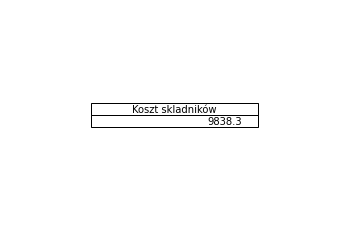

In [4]:
kosztSkladnikow = np.sum(ilosc @ ceny)
kosztSkladnikow = kosztSkladnikow.reshape(1,1)

col=['Koszt skladników']

table = plt.table(cellText=kosztSkladnikow, colLabels=col,loc='center',colWidths=[0.5])
table.scale(1, 1)
plt.axis('off')

### Zadanie 2

Napisać skrypt, który przyjmuje dwie macierze $A$ oraz $B$, a następnie wypisuje operacje wykonywane przy mnożeniu obu macierzy.

**Przykład:**

Wejście:

\begin{equation}
A = \begin{pmatrix}
1 & 2 & 1\\
4 & 4 & 5\\
6 & 7 & 7
\end{pmatrix}, 
 B = \begin{pmatrix}
-7 & -7 & 6\\
2 & 1 & -1\\
4 & 5 & -4
\end{pmatrix}
\end{equation}

Wyjście:

```
C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1 0 0]
 [0 1 0]
 [0 0 1]]
```



In [5]:
import copy

A = [[1,2,1],[4,4,5],[6,7,7]]
B = [[-7,-7,6],[2,1,-1],[4,5,-4]]

C = copy.deepcopy(B)
for row in range(len(C)):
    for col in range(len(C[0])):
        C[row][col] =0
print(C)
        
        
l = len(A)
n = len(B[0])

col = [0]*n
Csecond = [col]*l
print(Csecond)


Cthird = []
for i in range(l):
    row = []
    for k in range(n):
        row.append(0)
    Cthird.append(row)
print(Cthird) 



print('======')
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            C[i][j] += A[i][k] * B[k][j]
            Csecond[i][j] += A[i][k] * B[k][j]
            Cthird[i][j] += A[i][k] * B[k][j]
            

print(A)
print(B)
print(C)
print(Csecond)
print(Cthird)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[1, 2, 1], [4, 4, 5], [6, 7, 7]]
[[-7, -7, 6], [2, 1, -1], [4, 5, -4]]
[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
[[1, 1, 1], [1, 1, 1], [1, 1, 1]]
[[1, 0, 0], [0, 1, 0], [0, 0, 1]]


In [6]:
import numpy as np

A = np.array(A)
B = np.array(B)
C = np.array(C)

for x in range(len(A)):
    for y in range(len(A[0])):
        diffA = A[x,]
        diffB = B[:,y]
        print(f'C[{x} {y}] = {diffA[0]} * {diffB[0]} + {diffA[1]} * {diffB[1]} + {diffA[2]} * {diffB[2]} = {diffB @ diffA} ')
        
print("")
print(C)
        

C[0 0] = 1 * -7 + 2 * 2 + 1 * 4 = 1 
C[0 1] = 1 * -7 + 2 * 1 + 1 * 5 = 0 
C[0 2] = 1 * 6 + 2 * -1 + 1 * -4 = 0 
C[1 0] = 4 * -7 + 4 * 2 + 5 * 4 = 0 
C[1 1] = 4 * -7 + 4 * 1 + 5 * 5 = 1 
C[1 2] = 4 * 6 + 4 * -1 + 5 * -4 = 0 
C[2 0] = 6 * -7 + 7 * 2 + 7 * 4 = 0 
C[2 1] = 6 * -7 + 7 * 1 + 7 * 5 = 0 
C[2 2] = 6 * 6 + 7 * -1 + 7 * -4 = 1 

[[1 0 0]
 [0 1 0]
 [0 0 1]]
